<a href="https://colab.research.google.com/github/podtyazhki1337/cv/blob/main/correlation_between_alanine_aminotransferase_and_liver_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Определить тип зависимых и независимой переменных.**

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/indian_liver_patient.csv')
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
data=df[['Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Dataset']]

print(data)


     Alkaline_Phosphotase  Alamine_Aminotransferase  Dataset
0                     187                        16        1
1                     699                        64        1
2                     490                        60        1
3                     182                        14        1
4                     195                        27        1
..                    ...                       ...      ...
578                   500                        20        2
579                    98                        35        1
580                   245                        48        1
581                   184                        29        1
582                   216                        21        2

[583 rows x 3 columns]


**2** . **Установить наличие пропущенных значений в выборке. Если такие значения
будут найдены, удалить соответствующие строки из набора данных.**

In [ ]:
data.describe()

,Alkaline_Phosphotase,Alamine_Aminotransferase,Dataset
count,583.000000,583.000000,583.000000
mean,290.576329,80.713551,1.286449
std,242.937989,182.620356,0.452490
min,63.000000,10.000000,1.000000
25%,175.500000,23.000000,1.000000
50%,208.000000,35.000000,1.000000
75%,298.000000,60.500000,2.000000
max,2110.000000,2000.000000,2.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Alkaline_Phosphotase      583 non-null    int64
 1   Alamine_Aminotransferase  583 non-null    int64
 2   Dataset                   583 non-null    int64
dtypes: int64(3)
memory usage: 13.8 KB


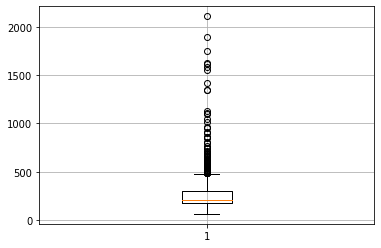

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.boxplot(data.Alkaline_Phosphotase)
plt.grid()
plt.show()

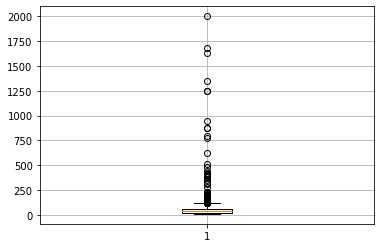

In [ ]:

plt.boxplot(data.Alamine_Aminotransferase)
plt.grid()
plt.show()

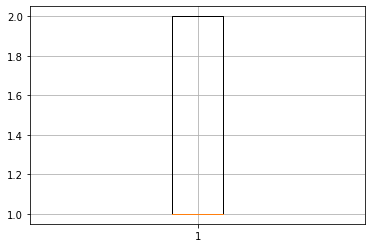

In [ ]:
plt.boxplot(data.Dataset)
plt.grid()
plt.show()

In [ ]:
print(data.shape)
print(data.dtypes)



(583, 3)
Alkaline_Phosphotase        int64
Alamine_Aminotransferase    int64
Dataset                     int64
dtype: object


In [ ]:
# отбор числовых колонок
data_numeric = data.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values
print(numeric_cols)


['Alkaline_Phosphotase' 'Alamine_Aminotransferase' 'Dataset']


In [ ]:
#Поиск отсутствующих данных
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Alkaline_Phosphotase - 0%
Alamine_Aminotransferase - 0%
Dataset - 0%


In [ ]:
#Поиск выбросов
for x in ['Alkaline_Phosphotase', 'Alamine_Aminotransferase']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
data.isnull().sum()

Alkaline_Phosphotase        69
Alamine_Aminotransferase    73
Dataset                      0
dtype: int64

In [ ]:
data=data.dropna(axis = 0)
data.isnull().sum()

Alkaline_Phosphotase        0
Alamine_Aminotransferase    0
Dataset                     0
dtype: int64

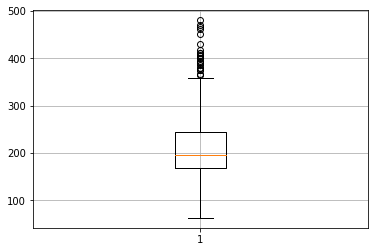

In [ ]:
plt.boxplot(data.Alkaline_Phosphotase)
plt.grid()
plt.show()

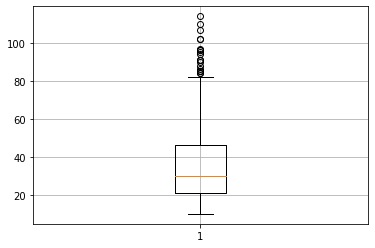

In [ ]:
plt.boxplot(data.Alamine_Aminotransferase)
plt.grid()
plt.show()

In [ ]:
data.head(15)

,Alkaline_Phosphotase,Alamine_Aminotransferase,Dataset
0,187.0,16.0,1
3,182.0,14.0,1
4,195.0,27.0,1
5,208.0,19.0,1
6,154.0,16.0,1
7,202.0,14.0,1
8,202.0,22.0,2
9,290.0,53.0,1
10,210.0,51.0,1
11,260.0,31.0,1


In [ ]:
data.describe()

,Alkaline_Phosphotase,Alamine_Aminotransferase,Dataset
count,456.000000,456.000000,456.000000
mean,213.177632,35.916667,1.344298
std,70.708294,20.185232,0.475661
min,63.000000,10.000000,1.000000
25%,167.750000,21.000000,1.000000
50%,195.000000,30.000000,1.000000
75%,245.000000,46.000000,2.000000
max,480.000000,114.000000,2.000000


In [ ]:
#Частота встречаемости значений
data.Dataset.value_counts()


1    299
2    157
Name: Dataset, dtype: int64

In [ ]:
#Среднее значение
data.Alamine_Aminotransferase.mean()

35.916666666666664

In [ ]:
data.Alkaline_Phosphotase.mean()

213.17763157894737

In [ ]:
#Минимальное значение
data.Alamine_Aminotransferase.min()

10.0

In [ ]:
data.Alkaline_Phosphotase.min()

63.0

In [ ]:
#Максимальное значение
data.Alamine_Aminotransferase.max()

114.0

In [ ]:
#Максимальное значение
data.Alkaline_Phosphotase.max()

480.0

In [ ]:
#Медиана
np.median(data['Alamine_Aminotransferase'].values)

30.0

In [ ]:
#Медиана
np.median(data['Alkaline_Phosphotase'].values)

195.0

In [ ]:
#1 квантиль
np.quantile(data.Alamine_Aminotransferase, 0.25)

21.0

In [ ]:
#3 квантиль
np.quantile(data.Alamine_Aminotransferase, 0.75)

46.0

In [ ]:
#1 квантиль
np.quantile(data.Alkaline_Phosphotase, 0.25)

167.75

In [ ]:
#3 квантиль
np.quantile(data.Alkaline_Phosphotase, 0.75)

245.0

In [ ]:
#ALKP = Фосфатаза щелочная
ALKP_healthy = data.loc[data.Dataset == 2,
                            'Alkaline_Phosphotase']
ALKP_diseased = data.loc[data.Dataset == 1,
                             'Alkaline_Phosphotase']

#АА = Аламинаминотрансфераза
AA_healthy = data.loc[data.Dataset == 2, 'Alamine_Aminotransferase']
AA_diseased = data.loc[data.Dataset == 1, 'Alamine_Aminotransferase']

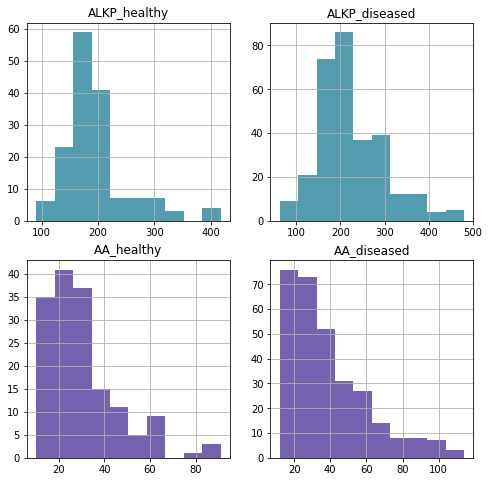

In [ ]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].hist(ALKP_healthy, color = '#539caf')
ax[0, 0].set_title('ALKP_healthy')
ax[0, 0].grid()

ax[0, 1].hist(ALKP_diseased, color = '#539caf')
ax[0, 1].set_title('ALKP_diseased')
ax[0, 1].grid()

ax[1, 0].hist(AA_healthy, color = '#7663b0')
ax[1, 0].set_title('AA_healthy')
ax[1, 0].grid()

ax[1, 1].hist(AA_diseased, color = '#7663b0')
ax[1, 1].set_title('AA_diseased')
ax[1, 1].grid()

fig.set_size_inches(8, 8)

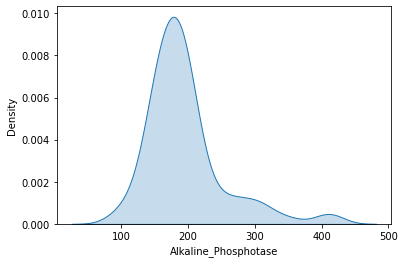

In [ ]:
snsplot = sns.kdeplot(ALKP_healthy, shade=True)
fig = snsplot.get_figure()

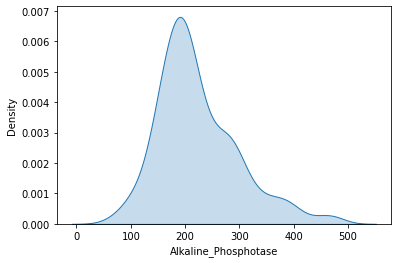

In [ ]:
snsplot = sns.kdeplot(ALKP_diseased, shade=True)
fig = snsplot.get_figure()

<function matplotlib.pyplot.show>

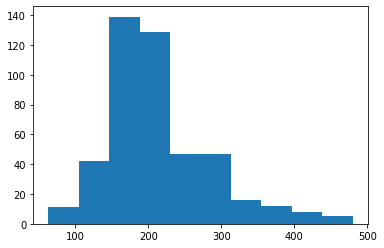

In [ ]:
plt.hist(data.Alkaline_Phosphotase)
plt.show

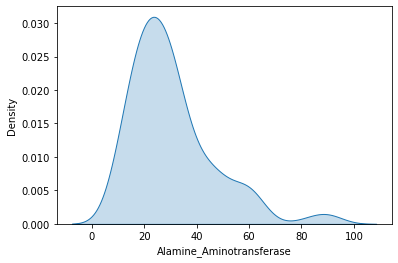

In [ ]:
snsplot = sns.kdeplot(AA_healthy, shade=True)
fig = snsplot.get_figure()

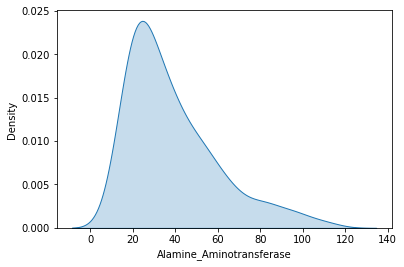

In [ ]:
snsplot = sns.kdeplot(AA_diseased, shade=True)
fig = snsplot.get_figure()

In [ ]:
import scipy
stat, p = scipy.stats.shapiro(ALKP_healthy) # тест Шапиро-Уилк
print("Statistics=%.3f, p-value=%.3f" % (stat, p))
alpha = 0.05
if p > alpha:
  print('Принять гипотезу о нормальности')
else:
  print('Отклонить гипотезу о нормальности')
print(p)

Statistics=0.841, p-value=0.000
Отклонить гипотезу о нормальности
8.731884139356882e-12


In [ ]:
import scipy
stat, p = scipy.stats.shapiro(ALKP_diseased) # тест Шапиро-Уилк
print("Statistics=%.3f, p-value=%.3f" % (stat, p))
alpha = 0.05
if p > alpha:
  print('Принять гипотезу о нормальности')
else:
  print('Отклонить гипотезу о нормальности')
print(p)

Statistics=0.938, p-value=0.000
Отклонить гипотезу о нормальности
7.102248233969988e-10


In [ ]:
import scipy
stat, p = scipy.stats.shapiro(AA_healthy) # тест Шапиро-Уилк
print("Statistics=%.3f, p-value=%.3f" % (stat, p))
alpha = 0.05
if p > alpha:
  print('Принять гипотезу о нормальности')
else:
  print('Отклонить гипотезу о нормальности')
print(p)

Statistics=0.876, p-value=0.000
Отклонить гипотезу о нормальности
3.6487682320007764e-10


In [ ]:
import scipy
stat, p = scipy.stats.shapiro(AA_diseased) # тест Шапиро-Уилк
print("Statistics=%.3f, p-value=%.3f" % (stat, p))
alpha = 0.05
if p > alpha:
  print('Принять гипотезу о нормальности')
else:
  print('Отклонить гипотезу о нормальности')
print(p)

Statistics=0.889, p-value=0.000
Отклонить гипотезу о нормальности
5.574145610148448e-14


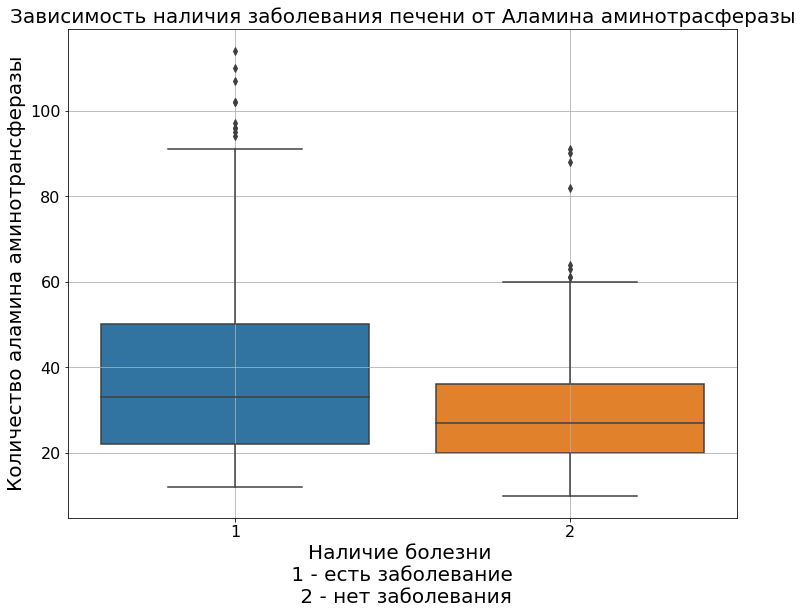

In [ ]:
fig, axes = plt.subplots(figsize=(12, 9))
sns.boxplot(x = data.Dataset, y = data.Alamine_Aminotransferase )

plt.title('Зависимость наличия заболевания печени от Аламина аминотрасферазы', size = 20, loc = 'center')
plt.xlabel('Наличие болезни \n 1 - есть заболевание \n 2 - нет заболевания', size = 20)
plt.ylabel('Количество аламина аминотрансферазы', size = 20)

for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)

for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

plt.grid()
plt.show()

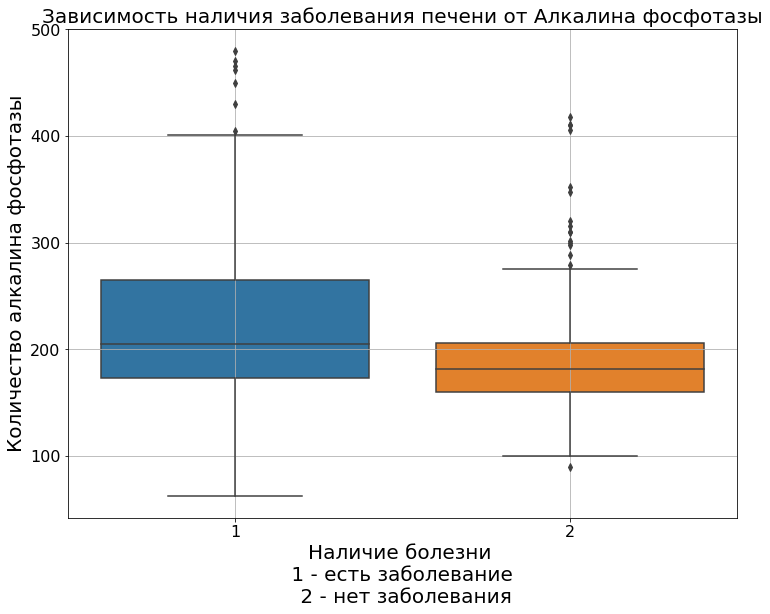

In [ ]:
fig, axes = plt.subplots(figsize=(12, 9))
sns.boxplot(x = data.Dataset, y = data.Alkaline_Phosphotase)

plt.title('Зависимость наличия заболевания печени от Алкалина фосфотазы',
          size = 20, loc = 'center')
plt.xlabel('Наличие болезни \n 1 - есть заболевание \n 2 - нет заболевания', size = 20)
plt.ylabel('Количество алкалина фосфотазы', size = 20)

for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(16)

for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)

plt.grid()
plt.show()

Сравним 2 группы по критерию Манна-Уитни.

In [ ]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(data.Alkaline_Phosphotase[data.Dataset == 1], data.Alkaline_Phosphotase[data.Dataset == 2])
print(f'U1={U1}, p = {round(p, 5)}')
alpha=0.05
if p < alpha:
  print('Существуют различия в значениях Алкалин Фосфотазы в группах здоровых и больных людей')
else:
  print('Различий в группах нет')

U1=17416.5, p = 0.0
Существуют различия в значениях Алкалин Фосфотазы в группах здоровых и больных людей


In [ ]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(data.Alamine_Aminotransferase[data.Dataset == 1], data.Alamine_Aminotransferase[data.Dataset == 2])
print(f'U1={U1}, p = {round(p, 5)}')
alpha=0.05
if p < alpha:
  print('Существуют различия в значениях Аламин аминотрансферазы в группах здоровых и больных людей')
else:
  print('Различий в группах нет')

U1=18183.0, p = 4e-05
Существуют различия в значениях Аламин аминотрансферазы в группах здоровых и больных людей
